<a href="https://colab.research.google.com/github/owayamaani/dashboard-1/blob/main/terrascope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#library imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

!pip install scikit-learn==1.4.2

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/project/soil_data.csv')
df

,label,ph,rainfall,humidity,temperature,nitrogen,phosphorous,potassium
0,tomatoes,6.211165,48,66,28,96,37,46
1,sweetpotatoes,5.362935,65,54,11,67,26,41
2,tomatoes,6.430166,60,56,30,80,20,51
3,sorghum,5.547591,80,62,20,41,11,22
4,tomatoes,6.457376,46,71,19,95,28,61
...,...,...,...,...,...,...,...,...
2814,rice,6.627659,98,55,31,56,13,30
2815,potatoes,5.899030,67,38,21,72,36,69
2816,orange,6.486091,51,48,27,32,10,170
2817,mungbeans,6.386136,75,39,19,49,22,54


EDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        2819 non-null   object 
 1   ph           2819 non-null   float64
 2   rainfall     2819 non-null   int64  
 3   humidity     2819 non-null   int64  
 4   temperature  2819 non-null   int64  
 5   nitrogen     2819 non-null   int64  
 6   phosphorous  2819 non-null   int64  
 7   potassium    2819 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 176.3+ KB


In [ ]:
df.describe()

,ph,rainfall,humidity,temperature,nitrogen,phosphorous,potassium
count,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000
mean,6.317675,115.523945,59.345513,22.484569,59.731465,20.793189,87.520043
std,0.485302,82.763490,13.618698,5.617450,57.905872,7.366807,55.386460
min,5.020397,40.000000,30.000000,7.000000,20.000000,8.000000,20.000000
25%,6.005385,66.000000,49.000000,19.000000,35.000000,15.000000,46.000000
50%,6.305293,85.000000,61.000000,22.000000,47.000000,20.000000,64.000000
75%,6.639889,142.000000,70.000000,27.000000,64.000000,25.000000,130.000000
max,7.993702,599.000000,85.000000,40.000000,493.000000,40.000000,298.000000


In [ ]:
df['label'].value_counts()

In [ ]:
df.isnull().sum()

Charts

<Axes: xlabel='label', ylabel='ph'>

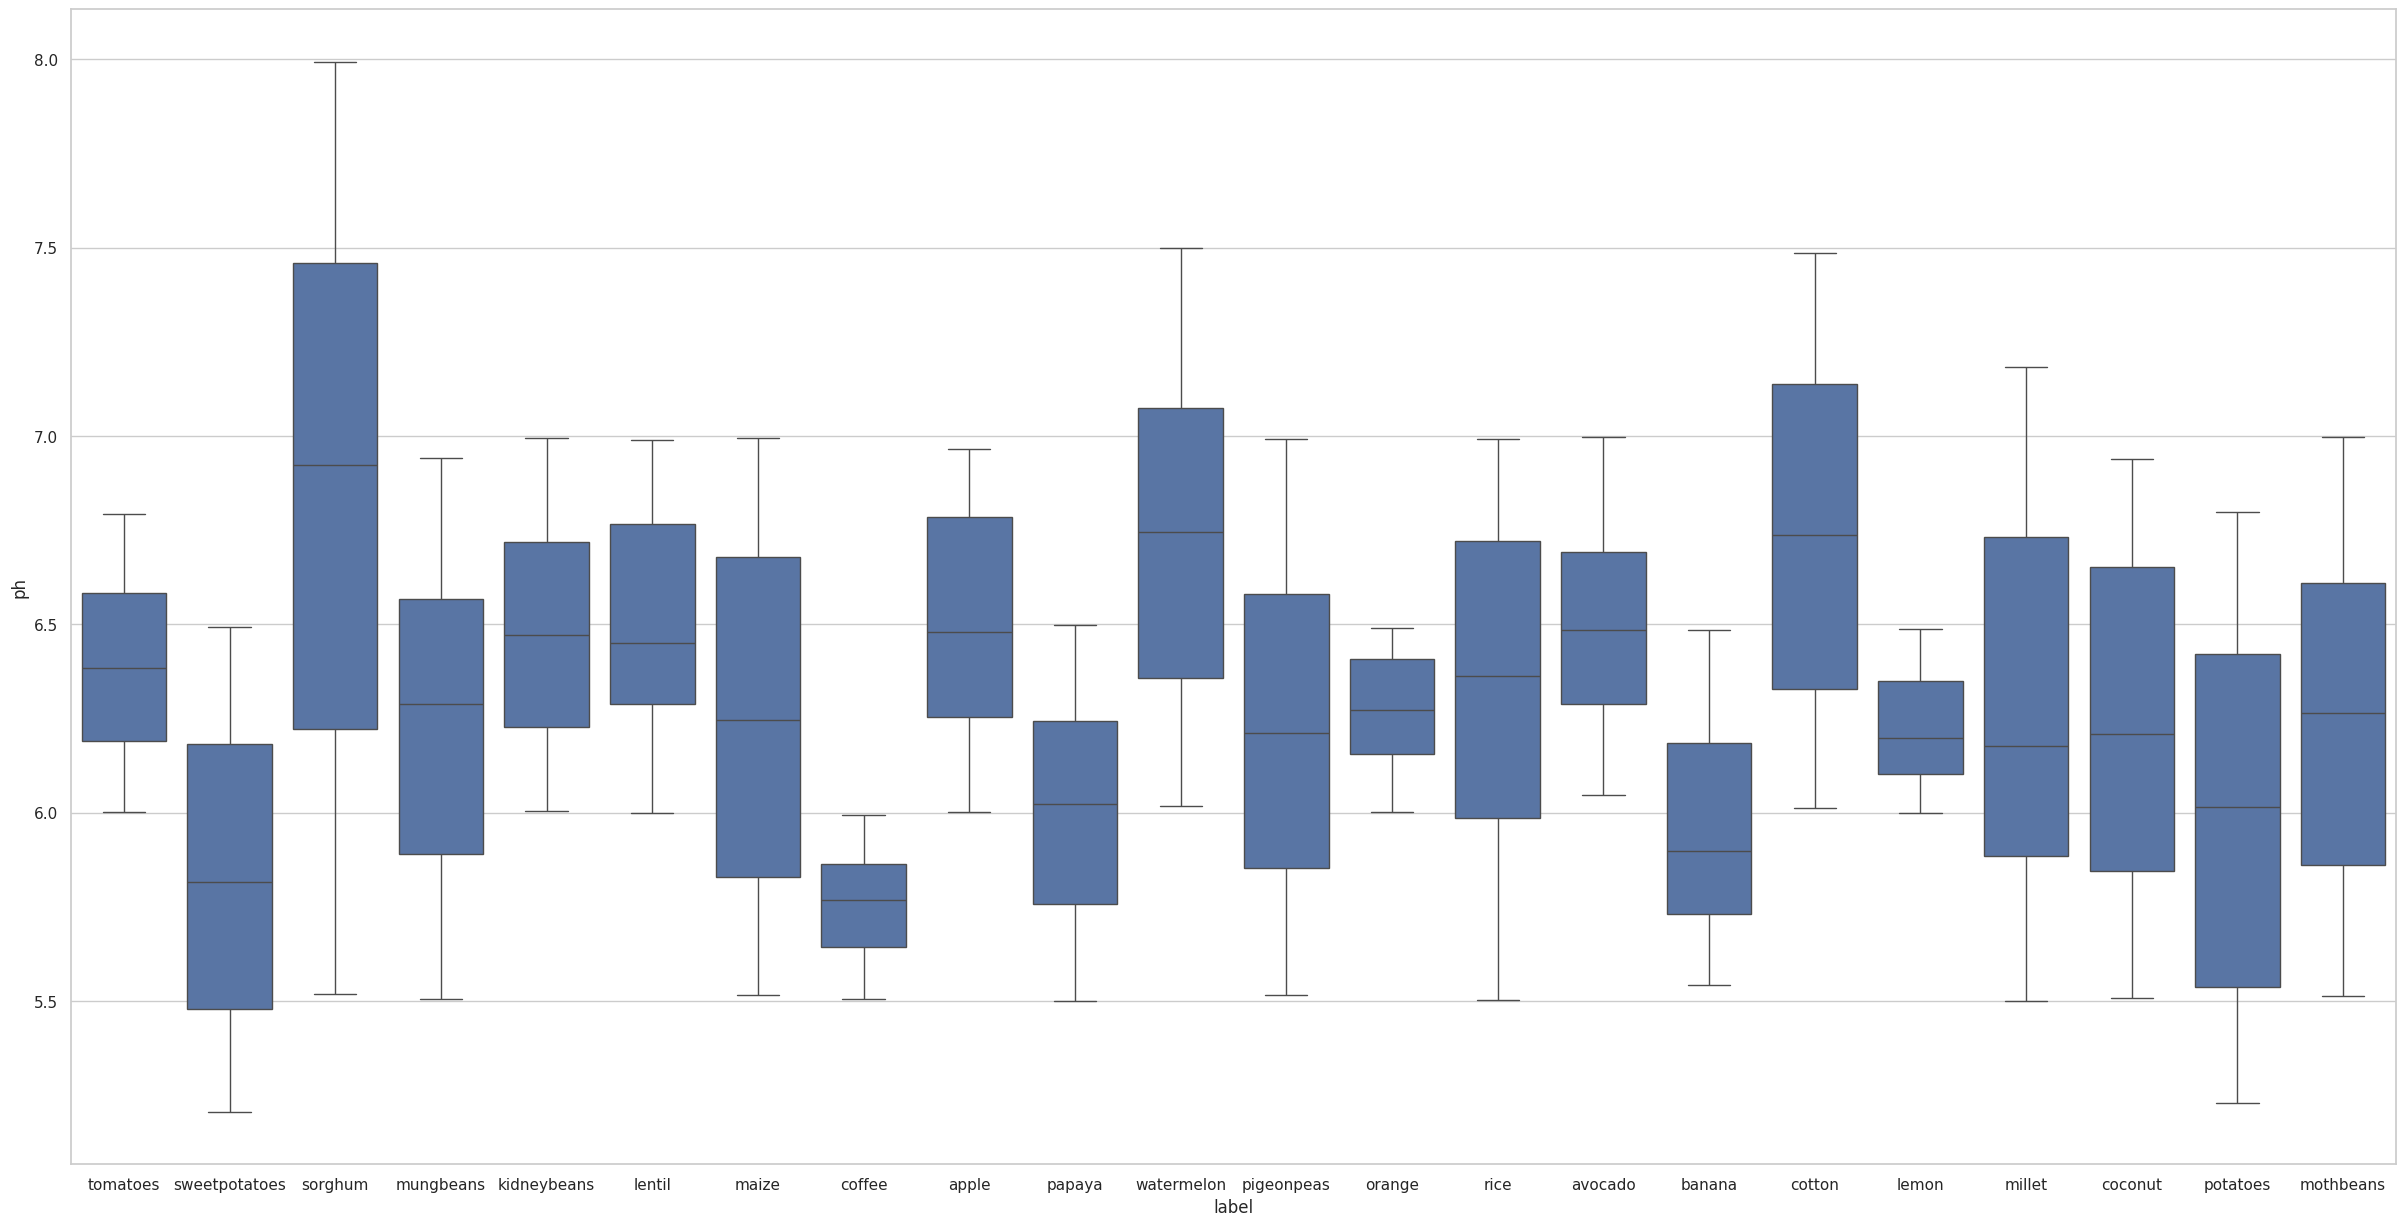

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=df)

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='nitrogen',data=df)

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='phosphorous',data=df)

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='potassium',data=df)

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

sns.distplot(df['temperature'],color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="purple",bins=15,hist_kws={'alpha':0.5})

In [ ]:
cols = df.columns.tolist()
cols

In [ ]:
df = df[['nitrogen',
 'phosphorous',
 'potassium', 'temperature', 'humidity', 'ph',
 'rainfall', 'label']]
df

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True,cmap='flare')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
#outlier detection
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

# Model Buiding

In [ ]:
#list for label unique values
class_labels = df['label'].unique().tolist()
class_labels

In [ ]:
#encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label']

In [ ]:
#retreive unique classes
class_labels = le.classes_
class_labels

In [ ]:
df

Train and test split

In [ ]:
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Model

In [ ]:
rf_model = RandomForestClassifier(criterion='gini',
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=1,
    oob_score=True,
    random_state=1,
    n_jobs=-1)
rf_model.fit(x_train,y_train)

In [ ]:
y_pred = rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()

print("Classification Report:\n",classification_report(y_test,y_pred))

In [ ]:
#parameter tuning
rf = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(50,200),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,25),
    'min_samples_split':np.arange(2,25),
    'min_samples_leaf':np.arange(2,25)}

rscv_model = RandomizedSearchCV(rf,param_grid, cv=5)
rscv_model.fit(x_train,y_train)
rscv_model.best_estimator_

In [ ]:
#model eval after applying hyper parameter
new_rf_model = rscv_model.best_estimator_

y_pred = new_rf_model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))


In [ ]:
y_pred_train = new_rf_model.predict(x_train)

print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_train))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_train))

In [ ]:
train_accuracy = accuracy_score(y_train,y_pred_train)
print("Train_accuracy =", train_accuracy)

Train_accuracy = 0.9114516815666242


In [ ]:
test_accuracy = accuracy_score(y_test,y_pred)
print("Test_accuracy =", test_accuracy)

Test_accuracy = 0.7509578544061303


In [ ]:
y_test.values[:10]

array([ 0, 14,  4,  2, 16, 10,  3,  7, 14,  2])

In [ ]:
y_pred[:10]

array([ 0,  4,  4,  2, 20, 10,  3,  7, 14,  2])

In [ ]:
class_labels

In [ ]:
label_dict = {}
for index,label in enumerate(class_labels):
    label_dict[label] = index

print(label_dict)

In [ ]:
df.columns.tolist()

In [ ]:
features_data = {'columns':list(x.columns)}
features_data

In [ ]:
features_data['columns']

In [ ]:
#save model
import pickle
import os

In [ ]:
pickle.dump(new_rf_model, open('/content/drive/MyDrive/project/rf_model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/drive/MyDrive/project/rf_model.pkl', 'rb'))
loaded_model

In [ ]:
test_series = pd.Series(np.zeros(len(features_data['columns'])),index=features_data['columns'])
test_series

In [ ]:
test_series['nitrogen'] = 90
test_series['phosphorous'] = 42
test_series['potassium'] = 43
test_series['temperature'] = 25
test_series['humidity'] = 86
test_series['ph'] = 6.5
test_series['rainfall'] = 220

test_series

In [ ]:
output = new_rf_model.predict([test_series])[0]
print("Recommended Crop:",class_labels[output])

In [ ]:
from joblib import dump, load

# Save the model with joblib
dump(new_rf_model, '/content/drive/MyDrive/project/model.joblib')

['/content/drive/MyDrive/project/model.joblib']

In [ ]:
import sklearn as sk
sk.__version__

'1.4.2'